<a href="https://colab.research.google.com/github/faridelya/Pandas-Seaborn-Numpy/blob/main/A17_Predict_Fish_Weight_Using_Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1: Create separate scatterplots to compare the fish weight (“Weight”) to each of the continuous independent variables: “Length1”, “Length2”, “Length3”, “Height”, and “Width”.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Fish.csv")
new= df.copy()

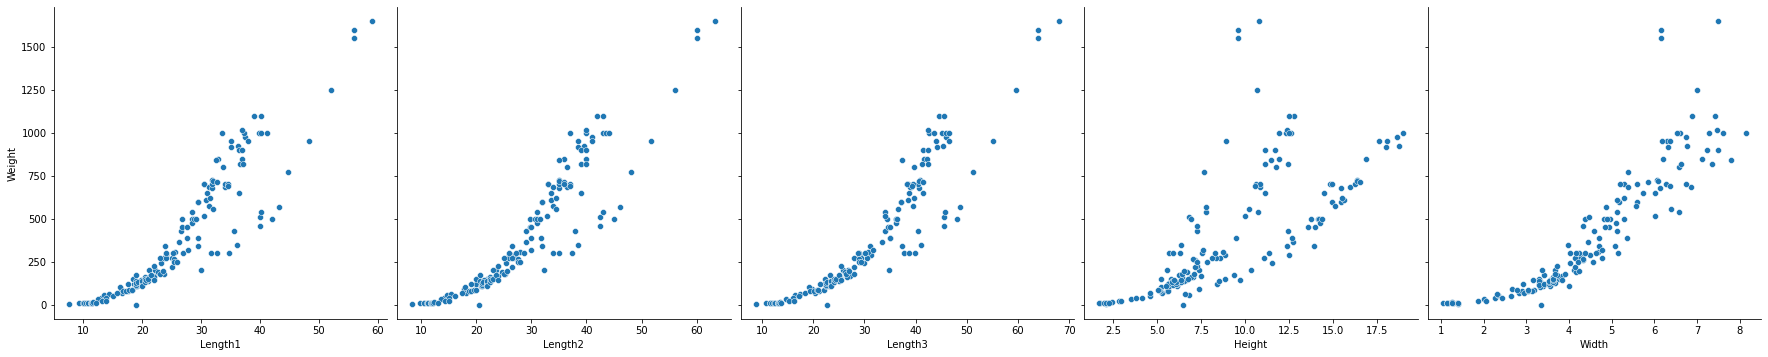

In [ ]:

sns.pairplot(df, x_vars=[ 'Length1', 'Length2', 'Length3', 'Height',
       'Width'], 
             y_vars='Weight', height=5, aspect=1, kind='scatter')
plt.show();


## **Question 2: Explain the concept of a dummy variable and how such variables are calculated. Why is it necessary to convert nominal variables to dummy variables when performing linear regression?**

**Answer**
- Machine Learning Model train on Numerical values so Nominal variable which is in our case ( Species ) must be convert to numerical variable before model training by converting to dummy variable.

 - Methods to convert Categorical Variables into Dummy Variables which is an essential part of data pre-processing, which in itself is an integral part of the Machine Learning or Statistical Model. The categorical variables can be further subdivided into the following categories :

1. Binary or Dichotomous is essentially the variables that can have only two outcomes such as Win/Lose, On/Off, and so on.
2. Nominal Variables are used to represent groups with no particular ranking such as colors, brands, and so on.
3. Ordinal Variables represent groups with a specified ranking order such as Winners of a race, App Ratings to name a few.

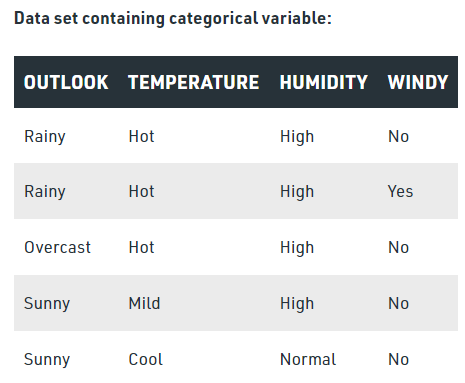


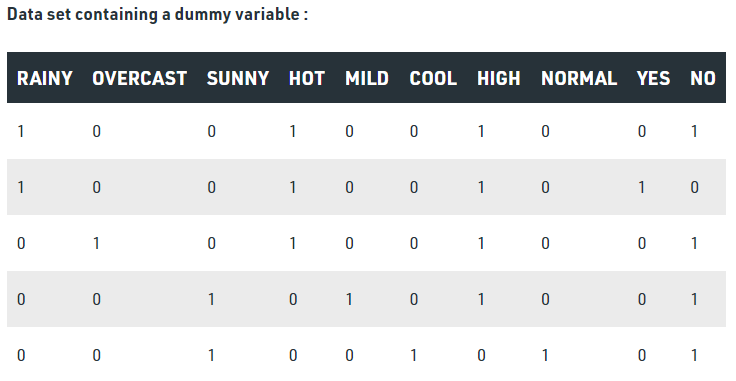 


- Now comparing the rows of the columns YES and NO with WINDY, we mark 0 for YES where it is absent and 1 where it is present. The same is done for column NO. This methodology is adopted for all the categorical columns

## **Task 2: Create a grouped box plot to compare the distribution of weight amongst the seven different species included in the dataset**

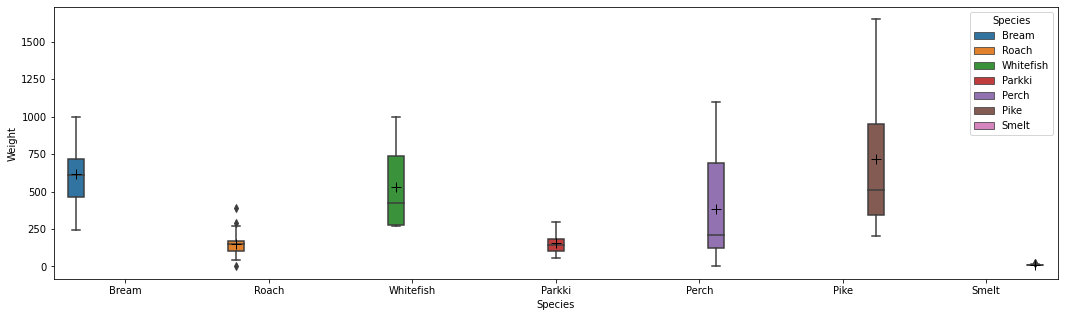

In [ ]:
fig,ax = plt.subplots(figsize = (18,5))
sns.boxplot(data=new, x='Species', y="Weight", hue='Species',showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"} );

In [ ]:
new.groupby('Species')['Weight'].mean()

Species
Bream        617.828571
Parkki       154.818182
Perch        382.239286
Pike         718.705882
Roach        152.050000
Smelt         11.178571
Whitefish    531.000000
Name: Weight, dtype: float64

## **Task 3: Recreate the scatterplots from Task 1. However, this time differentiate the different species using the color of each data point**

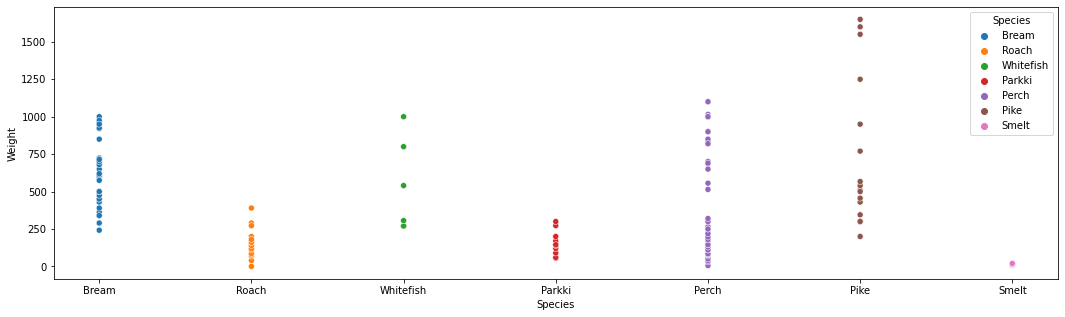

In [ ]:
fig,ax = plt.subplots(figsize = (18,5))
sns.scatterplot(data=new,  x='Species' , y=new['Weight'], hue='Species');

### **Question 7. Discuss the relationships between the dependent variable and each independent variable based on the scatterplots and grouped boxplot obtained. Does each independent variable appear to be correlated with fish weight? If so, is the correlation positive or negative? Is the correlation linear? Does the distribution of weight seem to vary by species? Does the relationship between weight and each continuous variable appear to be different between species?**

**Answer**
 -  ALL Independent variables ( **Length1”, “Length2”, “Length3”, “Height”, and “Width** ) has positive relation with dependent variable **Weight**. 
 - yes each independent variable value corelated with Weight variable.
 - the Corelation is positive.
 - Yes the corelation is linear .
 - Yes the Distribution of weight is vary by Species.
 - Yes relationship between weight and each continuous variable appear to be different between species


## **Task 4. Create dummy variables for the species variable**

In [ ]:
df2=pd.get_dummies(df['Species'])
df = pd.concat([df,df2],axis=1)
df.drop(["Species"],axis=1, inplace=True)
df.head()


,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


## **Task 5. Fit a multiple linear regression model that predicts “Weight” using the available continuous variables (“Length1”, “Length2”, “Length3”, “Height”, and “Weight”) and the dummy variables representing the species (“Species”).**

In [ ]:
# train with sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']]
y=df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)


multi_linear_modle = LinearRegression()
model = multi_linear_modle.fit(X_train,y_train)
train_pred = model.predict(X_train)
residual = train_pred - y_train 
model.score(X_train, y_train)


0.934522344981451

In [ ]:
model.coef_

array([ -51.48890807,   81.55593715,   -0.84067194,   31.20078588,
        -17.37821775, -142.3901489 ,  -13.97845811,   25.60267889,
       -204.90568997,    3.49650081,  311.09443904,   21.08067824])

In [ ]:
# train with statsmodel module
import statsmodels.api as sm 
X = sm.add_constant(X_train) 
est = sm.OLS(y_train, X_train).fit() 
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     149.2
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.22e-62
Time:                        19:57:24   Log-Likelihood:                -748.48
No. Observations:                 127   AIC:                             1521.
Df Residuals:                     115   BIC:                             1555.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length1      -51.4889     40.320     -1.277      0.204    -131.356      28.378
Length2       81.5559     49.793      1.638      0.104     -17.074     180.186
Length3       -0.8407     33.819     -0.025      0.980     -67.829      66.147
Height        31.2008     15.150      2.059      0.042       1.192      61.210
Width        -17.3782     28.127     -0.618      0.538     -73.093      38.336
Bream       -873.1437    138.729     -6.294      0.000   -1147.939    -598.349
Parkki      -744.7320     70.994    -10.490      0.000    -885.358    -604.106
Perch       -705.1509     47.083    -14.977      0.000    -798.413    -611.889
Pike        -935.6593    123.775     -7.559      0.000   -1180.834    -690.484
Roach       -727.2571     65.322    -11.133      0.000    -856.648    -597.866
Smelt       -419.6591     44.760     -9.376      0.000    -508.320    -330.998
Whitefish   -709.6729     77.565     -9.149      0.000    -863.314    -556.032
==============================================================================
Omnibus:                       46.432   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.688
Skew:                           1.369   Prob(JB):                     5.66e-30
Kurtosis:                       7.238   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Task 6. Calculate or obtain the Adjusted R-Squared and RMSE metrics for the model.**

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

#mke prediction on test data
y_pred = model.predict(X_test)

R_squared = r2_score(y_test, y_pred)
RMSE = np.sqrt(mse(y_test, y_pred))

print(" R-squared = ", R_squared,"\n")
print(" RMSE = ", RMSE, "\n")

 R-squared =  0.9255101946511249 

 RMSE =  110.70911266582378 



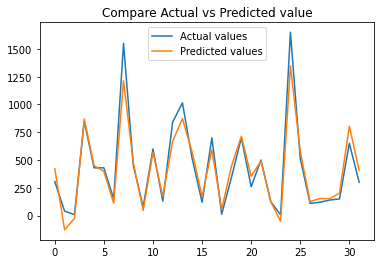

In [ ]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.title("Compare Actual vs Predicted value")
plt.legend(["Actual values","Predicted values"])
plt.show()

### **Question 8. Describe the model performance using the obtained Adjusted R-Squaredand RMSE values. Also, discuss the coefficients obtained. What variable coefficients were found to be statistically significant in the model?**

**Answer**
 - a one-unit increase in **Height**  will cause an average increase of **31.20078588** units(coeff value of Height) on the dependent variable.
 - R2 value is high near to 1 which mean model has high predicted power.
 - Also we can see model performance from above plot that compare actual dependent value and predicticed dependent values.
 - The RMSE value tells us that the average deviation between the predicted **Weight** made by the model and the actual independent variable the lower the value the best will be the model.
 - The followig variable coeff is statistically significant.
 - It is standard practice to use the coefficient p-values to decide whether to include variables in the final model.
- **Variable**,          **P_value**          
- Height ---	          0.042	
- Bream	---          	0.000	
- Parkki ---	        	0.000	
- Perch ---	          	0.000	
- Pike ---	          	0.000	
- Roach ---	        		0.000	
- Smelt ---	        		0.000	
- Whitefish ---	        0.000	

  these varable has p_value < 0.05 so these are statically significant. 


### **Task 7. Calculate a QQ-Plot to assess the model assumptions**

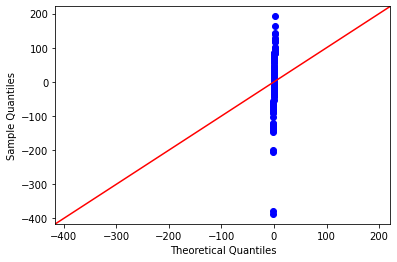

In [ ]:
from statsmodels.api import qqplot
import statsmodels.api as sm 
import pylab as py 

# np.random generates different random numbers everytime the code is executed.


sm.qqplot(residual.values, line ='45')
py.show()

### **Task 8. Create a plot with the “Weight” values mapped to the x-axis and the residuals mapped to the y-axis to assess homoscedasticity.**

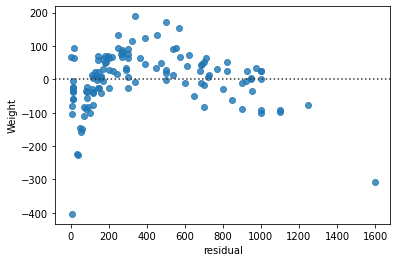

In [ ]:

sns.residplot(x=y_train, y=residual)
plt.xlabel("residual")

plt.show()


### **Question 9. Discuss the graphs obtained in Task 7 and 8. Do these graphs suggest issue of normality of the residuals and/or homoscedasticity in the model?**

 - yes the QQ plot show the normality issue of the residuals.
 - the second plot are not showing homoscedasticity because in this dots must has about the same variance.